# Resumo, Teoria e Prática - Metódo de Newton-Raphson
> Autor: Gil Miranda<br>
> Contato: gilsmneto@gmail.com<br>
> Repo: http://www.gilmiranda.me<br>
> GitHub: [@mirandagil](https://github.com/mirandagil)<br>
> Fontes bibliográficas:
   * Scientific Computing with MATLAB and Octave, Quarteroni, Saleri, Gervasio. 3th ed. 2003. Springer
   * http://www.im.ufrj.br/bernardofpc/cursos/cientificaI/2017/Semana3-Parte2-Newton.ipynb
   * http://www.im.ufrj.br/bernardofpc/cursos/cientificaI/2017/Semana3-Parte3-GraficosConvergenciaNewton.ipynb
   * http://www.im.ufrj.br/bernardofpc/cursos/cientificaI/2017/Semana3-Parte4-AnaliseNewton.ipynb
   * https://www.youtube.com/watch?v=lh5kuaf8jjo&t=3650s
   * https://www.researchgate.net/publication/268666466_Three_variations_on_Newton%27s_method
   * https://math.stackexchange.com/questions/350740/why-does-newtons-method-work
   * https://medium.com/@ruhayel/an-intuitive-and-physical-approach-to-newtons-method-86a0bd812ec3
   
`last update: 13/10/2018`

### A forma mais simples do metódo de Newton-Raphson

Vamos tomar uma equação:<br>
$$4x^3 + x+1 = 0 \\
(2x+1)\cdot(2x^2-x+1)=0 \\ $$
A raíz da equação é então obtida resolvendo $(2x+1 = 0)$ ou $(2x^2-x+1=0)$

$$2x_0+1 = 0 \\
2x_0 = -1 \\
x_0 = -1/2$$

$$
2x_1^2 - x_1 + 1 = 0 \\
\Delta = 1 - 4(2) \implies \Delta < 0
$$

Logo nossa equação pois apenas $x = -1/2$ como raíz real, sendo as outras duas raízes imaginárias, portanto nos atentaremos apenas na raíz real como facilitadora das contas, embora o metódo funcione tranquilamente para raízes complexas

Olhando para uma equação parecida: $x^3+x+1.1 =0$, agora já se torna mais complicado fatorar e extrair uma raíz. Um metódo de aproximar a solução dessa raíz é o metódo de Newton, primeiro observemos que a raíz com certeza está próxima da raíz da equação anterior, pois são curvas muito próximas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

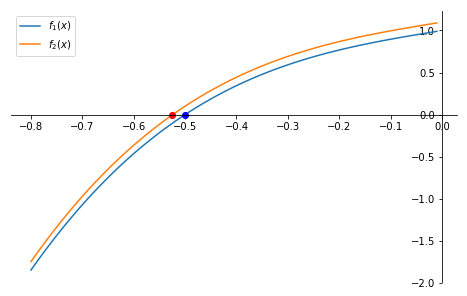

In [2]:
def f_1(x):
    return 4*x**3+x+1
def f_2(x):
    return 4*x**3+x+1.1

xis = np.arange(-0.8,0,0.01)

fig, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(8,5))
ax1.plot(xis,f_1(xis),label='$f_1(x)$')
ax1.plot(xis,f_2(xis),label='$f_2(x)$')
ax1.plot(-1/2,0,'bo')
ax1.plot(-0.525,0,'ro')

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_position(('data',0))
ax1.spines['left'].set_position(('data',0))

ax1.legend(loc=0)

Pelas curvas percebemos que a raíz de $f_2$ está próxima da raíz de $f_1$<br>
Chamaremos a raíz de $f_1$ de $x_0$, nosso ponto inicial
Um bom chute para a raíz de $f_2$ então é: $x_1 = x_0 + \epsilon$, com $|\epsilon|\ll 1$<br>
Substituindo então nosso chute com $x_0 = -\frac{1}{2} $ para a raíz em $f_2$

$$\begin{align}
f_2(x_1) &= 4(x_0+\epsilon)^3 + (x_0+\epsilon) + 1.1\\
&= 4x_0^3 + 4\cdot3x_0^2\epsilon + 4\cdot3x_0\epsilon^2+4\cdot\epsilon^3 + x_0 + \epsilon + 1.1\\
&= -\frac{4}{8} - 3\epsilon - 6\epsilon^2 + 3\epsilon^3 - \frac{1}{2} + \epsilon + 1.1 \\
&= 4\epsilon^3 - 6\epsilon^2 - 3\epsilon - \frac{1}{2} - \frac{1}{2} + \epsilon + 1.1 \\
&= 4\epsilon^3 - 6\epsilon^2 - 4\epsilon + 0.1 \\
\end{align}
$$

A ideia do metódo consiste em poder ignorar erros 'despreziveis', como $|\epsilon|\ll 1$, então $|\epsilon^n| \ll \epsilon$, ignorando os termos onde $\epsilon$ tem uma potência maior que $1$, sobra uma equação linear: $4\epsilon + 0.1$ 
$$
4\epsilon + 0.1 \approx 0\\
\epsilon \approx -\frac{1}{40}
$$

Substituindo no chute pra raíz $x_1 \approx x_0 + \epsilon $, teremos:
$$
x_1 \approx -1/2 - \frac{1}{40}\\
x_1 \approx -\frac{21}{40} = -0.525
$$

Que é um chute muito próximo da raíz de $f_2$ <br>
A idéia central do metódo desenvolvido por Newton é, a partir de um ponto inicial $x_0$  encontrar um ponto $x_{1}$ 'próximo' a uma raíz jogando fora erros que podem ser desprezados por serem muito pequenos e num processo iterativo, encontrar outros pontos $x_{n+1}$ até que tenhamos $f(x_{n}) \approx 0$

### O metódo de Newton-Raphson

Iremos construir o ponto $x_{n+1}$ e o $\epsilon$ baseando em ideias de derivadas.<br>
É fato sabido do Cálculo I que a reta tangente a uma curva definida por $f(x)$ em um ponto $x_0$ é uma boa aproximação de $f$ em $x_0$<br>
A equação da reta tangente $y$ é dada por:
$$
y - y_0 = f'(x_0)(x - x_0) \\
y \approx f(x_0) \text{ e } y_0 = f(x_0)$$
Vamos tomar $x = x_{1}$, uma raíz da equação da reta tangente
$$
0 - y_0 = f'(x_0)(x_1-x_0) \\
x_1 - x_0 = -\frac{f(x_0)}{f'(x_0)} \\
\therefore x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}
$$

Fazendo um paralelo com a forma mais 'simples' descrita acima, vemos que $\epsilon = - \frac{f(x_0)}{f'(x_0)}$
Então $x_1$ é um chute para a raíz, para completar o metódo é necessário definir uma tolerância para $f(x_n) \approx 0$ e testar os valores $x_{ns}$ gerados pela iteração do metódo com o passo descrito acima<br>
Portanto, de forma geral, o metódo de Newton gera possíveis valores $x_n$ para a raíz de $f$ a partir de um $x_0$, que é um primeiro chute para a raíz, ou seja, está 'próximo' da raíz, o metódo é dado pela iteração do passo: <br>
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

A fórmula geral do passo nos mostra que o metódo funciona mal quando $x_n$ está próximo de uma raíz de $f'(x_n)$, pois o denominador tende a 0 e a fração inteira tende ao infinito, fazendo com que o metódo 'exploda'

##### newton(f,df,x,tol,maxiter)

In [3]:
def newton(f, df, x, prec=1e-8, tol=1e-8, maxiter=100):
    if maxiter == 0: return none
    h = f(x)/df(x) ## passo de newton
    x_n = x - h ## gerando o próximo x
    if abs(h) < prec or abs(f(x)) < tol: return x_n ## testando se já estamos suficientemente próximos da raíz
    else: return newton(f,df, x_n, prec, tol, maxiter-1) ## chamando a função recursivamente para gerar um novo ponto

Vamos utilizar o metódo criado para encontrar uma melhor aproximação da raíz de $f_2$

In [4]:
def d_f2(x): return 12*x**2 +1 ## derivada de f_2

newton(f_2, d_f2, -1/2)

-0.5241137677810039

## Visualizando o metódo graficamente

Faremos uma pequena modificação para que o metódo retorne uma lista dos pontos gerados, ao invés de apenas o último

In [5]:
def newton_list(f, df, x, xis=[], prec=1e-8, tol=1e-8, maxiter=100):
    if maxiter == 0: return none
    h = f(x)/df(x) ## passo de newton
    x_n = x - h ## gerando o próximo x
    xis = xis[:] ## Faz uma cópia da lista, para não trabalhar com o ponteiro de memória
    xis.append(x_n)
    if abs(h) < prec or abs(f(x)) < tol: return xis ## testando se já estamos suficientemente próximos da raíz
    else: return newton_list(f,df, x_n, xis, prec, tol, maxiter-1) ## chamando a função recursivamente para gerar um novo ponto

In [6]:
## testando
newton_list(f_2,d_f2,-1/2)

[-0.525, -0.5241149158444574, -0.5241137677829334, -0.5241137677810039]

In [7]:
phi = (1+5**0.5)/2
xis = np.arange(-2,3/2,0.01)
def f(x): return np.e**x -x**3 - phi
def d_f(x): return np.e**x - 3*x**2

Text(0.5, 1.0, 'Gráfico da $f(x)$')

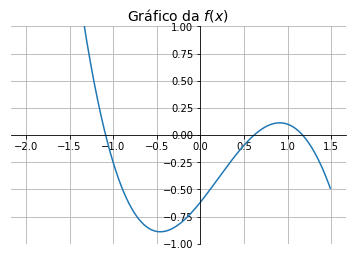

In [8]:
plt.plot(xis,f(xis))
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position(('data',0))
ax.spines['bottom'].set_position(('data',0))
ax.set_ylim(-1,1)
ax.grid()
ax.set_title('Gráfico da $f(x)$',fontsize=14)

$$
f(x) = e^x - x^3 + \phi \\
f'(x) = e^x - 3x^2
$$


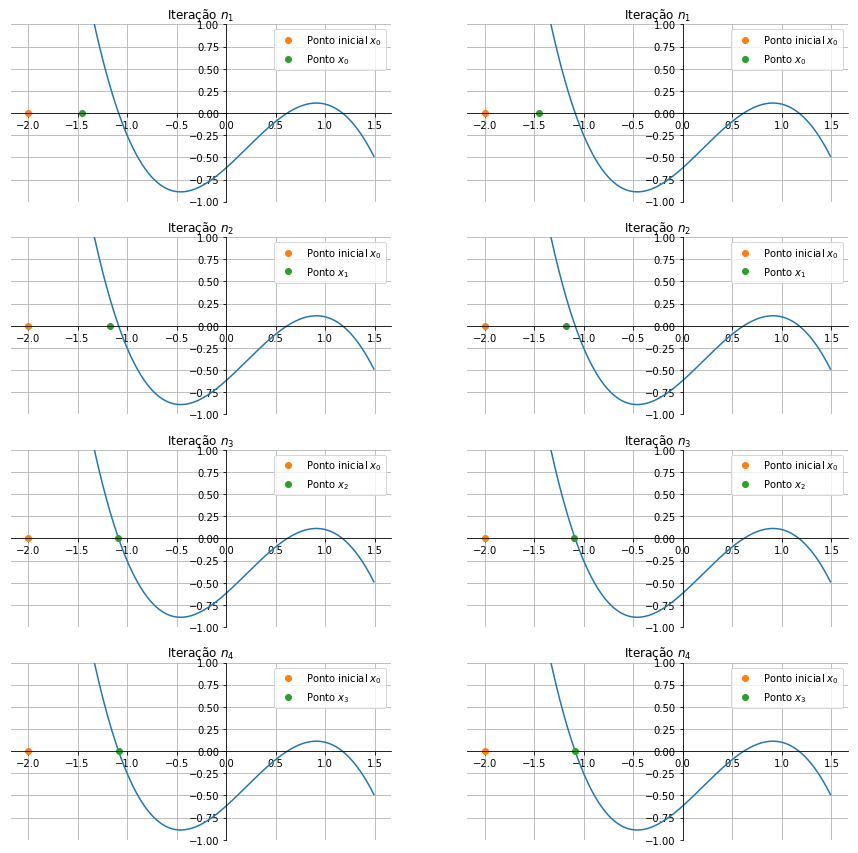

In [9]:
#work in progress
pontos = newton_list(f,d_f,-2,prec=1e-15, tol=1e-12)
qt_axes = len(pontos)
qt_rows = int(qt_axes/2+1)
fig, (ax) = plt.subplots(nrows=qt_rows, ncols=2, figsize=(15,15))

for i in range(0,qt_rows):
    for j in range(0,2):
        ax[i][j].plot(xis, f(xis))
        ax[i][j].spines['top'].set_color('none')
        ax[i][j].spines['right'].set_color('none')
        ax[i][j].spines['left'].set_position(('data',0))
        ax[i][j].spines['bottom'].set_position(('data',0))
        ax[i][j].set_ylim(-1,1)
        ax[i][j].grid()
        ax[i][j].set_title('Iteração $n_' + str(i+1) + '$')
        ax[i][j].plot(xis[0],0,'o', label='Ponto inicial $x_0$')
        ax[i][j].plot(pontos[i],0,'o', label='Ponto $x_'+ str(i)+ '$')
        ax[i][j].legend()